In [128]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import math

%matplotlib inline

In [84]:
df = pd.read_csv("Downloads/political_donations.csv", 
                 header=None, 
                 skiprows=1, 
                 #nrows=100, 
                 index_col=False, 
                 names=
                [
'cmte_id',
'cand_id',
'cand_nm',
'contbr_nm', 
'contbr_city', 
'contbr_st',
'contbr_zip',
'contbr_employer', 
'contbr_occupation',
'contb_receipt_amt',
'contb_receipt_dt',
'receipt_desc',
'memo_cd',   
'memo_text', 
'form_tp',
'file_num', 
'tran_id',   
'election_tp'
])

In [85]:
df.head(5)

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,tran_id,election_tp
0,C00458844,P60006723,"Rubio, Marco","BLUM, MAUREEN",WASHINGTON,20,DC,STRATEGIC COALITIONS & INITIATIVES LL,OUTREACH DIRECTOR,175.0,15-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1152124,P2016
1,C00458844,P60006723,"Rubio, Marco","DODSON, MARK B. MR.",ATLANTA,30,GA,MORTGAGE CAPITAL ADVISORS,PRIVATE MORTGAGE BANKING,25.0,16-MAR-16,NaN,NaN,DEBT RETIREMENT,SA17A,1082559,SA17.1153048,P2016
2,C00458844,P60006723,"Rubio, Marco","CHILDERS, WILLIAM",DPO,AE,098309998,DIPLOMAT,US GOVERNMENT,100.0,20-FEB-16,NaN,NaN,NaN,SA17A,1056862,SA17.1020839,P2016
3,C00458844,P60006723,"Rubio, Marco","DOHERTY, THERESA",APO,AE,097520002,DODEA/DS,TEACHER,500.0,26-JUN-15,NaN,NaN,NaN,SA17A,1029436,SA17.769700,P2016
4,C00458844,P60006723,"Rubio, Marco","RUCINSKI, ROBERT",APO,AE,090960009,US ARMY,PHYSICIAN,200.0,10-MAR-16,NaN,NaN,NaN,SA17A,1082559,SA17.1078677,P2016


In [86]:
df.shape

(4194081, 18)

In [91]:
df.groupby(by='cand_nm').sum().round().sort_values('contb_receipt_amt', ascending=False)

,contb_receipt_amt,file_num
cand_nm,,
"Clinton, Hillary Rodham",232791964.0,1151925943930
"Sanders, Bernard",92252526.0,2187333935568
"Cruz, Rafael Edward 'Ted'",61790199.0,588647296304
"Bush, Jeb",31714421.0,31050483424
"Rubio, Marco",31316443.0,110236353568
"Carson, Benjamin S.",26465348.0,261157274135
"Trump, Donald J.",14541694.0,44512047870
"Kasich, John R.",14219671.0,27140480690
"Christie, Christopher J.",7858970.0,6370217748


In [104]:
sum_df = df.groupby("cand_nm").sum().sort_values("contb_receipt_amt")

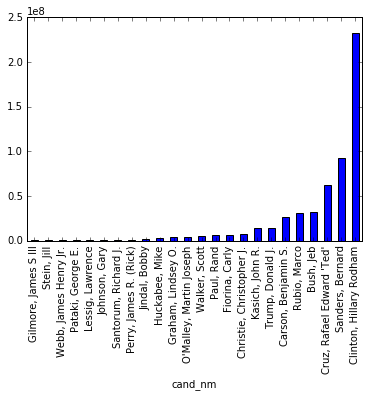

In [105]:
sum_df["contb_receipt_amt"].plot(kind="bar")

In [102]:
mean_df = df.groupby("cand_nm").mean().sort_values("contb_receipt_amt")

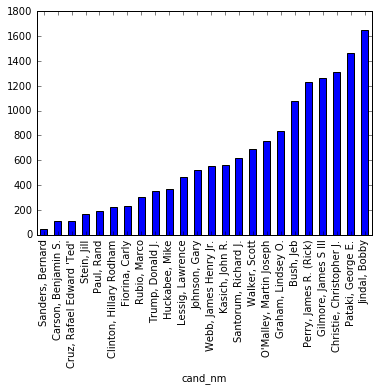

In [103]:
mean_df["contb_receipt_amt"].plot(kind="bar")

In [106]:
pdf = df[["contbr_st", "contbr_occupation", "cand_nm", "contb_receipt_amt"]]

In [109]:
pdf.head(5)

,contbr_st,contbr_occupation,cand_nm,contb_receipt_amt
0,20,OUTREACH DIRECTOR,"Rubio, Marco",175.0
1,30,PRIVATE MORTGAGE BANKING,"Rubio, Marco",25.0
2,AE,US GOVERNMENT,"Rubio, Marco",100.0
3,AE,TEACHER,"Rubio, Marco",500.0
4,AE,PHYSICIAN,"Rubio, Marco",200.0


In [118]:
df["contbr_st"] = df["contbr_st"].astype('category')
df["contbr_st"] = df["contbr_st"].cat.codes

In [119]:
df["contbr_st"]

0           0
1           1
2           3
3           3
4           3
5           3
6           3
7           3
8           3
9           3
10          3
11          3
12          3
13          3
14          3
15          3
16          3
17          3
18          3
19          3
20          4
21          4
22          4
23          4
24          4
25          4
26          4
27          4
28          4
29          4
           ..
4194051    89
4194052    89
4194053    89
4194054    89
4194055    89
4194056    89
4194057    89
4194058    89
4194059    89
4194060    90
4194061    90
4194062    90
4194063    90
4194064    90
4194065    90
4194066    90
4194067    90
4194068    90
4194069    90
4194070    90
4194071    90
4194072    90
4194073    90
4194074    90
4194075    91
4194076    91
4194077    91
4194078    91
4194079    92
4194080    94
Name: contbr_st, dtype: int8

In [121]:
for column in ["contbr_st", "contbr_occupation", "cand_nm"]:
    df[column] = df[column].astype('category')
    df[column] = df[column].cat.codes

In [124]:
train, test, y_train, y_test = train_test_split(df[["contbr_st", "contbr_occupation", "cand_nm"]], df["contb_receipt_amt"], test_size=0.33, random_state=1)

In [126]:
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10)

model.fit(train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [127]:
predictions = model.predict(test)

In [129]:
mean_squared_error(predictions, y_test)

58795889.360076033